In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]= "2"
import numpy as np

launch.json used to generate epoch-wise pkls

In [88]:
# {
#     "version": "0.2.0",
#     "configurations": [
#      {
#          "name": "Run with argument",
#          "type": "python",
#          "request": "launch",
#          "program": "${file}",
#          "console": "integratedTerminal",
#          "cwd": "${workspaceFolder}/tools",
#          "env": {"CUDA_VISIBLE_DEVICES": "1"},
#          "args": ["--cfg_file" ,
#                  "cfgs/kitti_models/pv_rcnn_ssl_60.yaml",
#                  "--batch_size",
#                  "1",
#                  "--ckpt",
#                 "../output/cfgs/kitti_models/pv_rcnn_ssl_60/new_main_3diou_ckpt_36221f4/ckpt/checkpoint_epoch_80.pth",
#                 // "--save_to_file",
#                 "--extra_tag",
#                 "new_main_3diou_ckpt_36221f4_frame_dupl_counter",
#                 "--epochs",
#                 "101",
#                 //  "--ckpt_save_interval",
#                 //  "1",
#                  "--repeat",
#                  "5",
#                  "--fix_random_seed",
#                  "--thresh",
#                  "0.5,0.25,0.25",
#                  "--sem_thresh",
#                  "0.4,0.4,0.4",
#                  "--dbinfos",
#                  "kitti_dbinfos_train_0.01_1_37.pkl",
#                  "--split",
#                  "train_0.01_1",
#                  "--set",
#                  "MODEL.STORE_SCORES_IN_PKL",
#                  "True",
#                 ],
#      }
#     ]
#  }


In [2]:
import os
import pickle
import torch
# Directory containing the pickle files
# pickle_dir = "/mnt/data/adat01/adv_OpenPCDet/output/kitti_models/pv_rcnn_ssl_60/new_main_3diou_ckpt_36221f4_frame_dupl_counter_447fde5"
# pickle_dir2 = "/mnt/data/adat01/adv_OpenPCDet/output/cfgs/kitti_models/pv_rcnn_ssl_60/new_main_3diou_ckpt_36221f4_debug_d171a9a"
# pickle_dir2 = "/mnt/data/adat01/adv_OpenPCDet/output/cfgs/kitti_models/pv_rcnn_ssl_60/org_3diou_ckpt_60_984cd77_tsnes_d7a30d4"
# pickle_dir2 = "/mnt/data/adat01/adv_OpenPCDet/output/cfgs/kitti_models/pv_rcnn_ssl_60/new_main_3diou_ckpt_36221f4_debug_d171a9a"
pickle_dir2 = "/mnt/data/adat01/adv_OpenPCDet/output/cfgs/kitti_models/pv_rcnn_ssl_60/org_3diou_ckpt_60_984cd77_tsnes_lu_fcfcb9b"
# List all pickle files in the directory
pickle_files = [file for file in os.listdir(pickle_dir2) if file.endswith(".pkl")]

# Initialize an empty dictionary to store aggregated data
snapshot_pl_data_20 = {}

# Iterate over each pickle file
for file in pickle_files:
    # Load the pickle file
    with open(os.path.join(pickle_dir2, file), "rb") as f:
        data = pickle.load(f)
    # Combine the data from the current file with the aggregated data
    for key, value in data.items():
        if key not in snapshot_pl_data_20:
            snapshot_pl_data_20[key] = []
        snapshot_pl_data_20[key].extend(value)

snapshot_pl_data_20['unique_gt_inds_over_thresh'] = snapshot_pl_data_20['gt_inds_over_thresh']
# snapshot_pl_data_20['unique_gt_inds_over_thresh2'] = snapshot_pl_data_20['gt_inds_over_thresh2']

In [90]:
# snapshot_pl_data_20['unique_gt_inds_over_thresh2'] = snapshot_pl_data_20['gt_inds_over_thresh2']

In [3]:
snapshot_pl_data_20.keys()


dict_keys(['iou_roi_pl', 'iou_roi_gt', 'obj_scores', 'gt_boxes', 'assigned_gt_inds', 'assigned_iou_class', 'iou_values', 'pl_conf_scores', 'roi_scores', 'num_points_in_roi', 'pl_sem_scores', 'iteration', 'shared_features', 'frame_id', 'shared_features_gt', 'pl_uids', 'iou_values2', 'iou_assigned_label2', 'gt_classes2', 'gt_inds_over_thresh2', 'labeled_mask', 'unlabeled_mask', 'pl_boxes', 'ori_gt_boxes', 'iou_assigned_label', 'gt_classes', 'gt_inds_over_thresh', 'pl_labels', 'lbl_shared_features_gt', 'lbl_pl_labels', 'pred_scores', 'class_labels', 'unique_gt_inds_over_thresh'])

In [4]:
pl_conf_scores = snapshot_pl_data_20['pl_conf_scores']
pl_conf_flt = torch.cat([tensor for sublist in pl_conf_scores for tensor in sublist]).cpu()
print(pl_conf_flt.shape)
pl_iou_values= snapshot_pl_data_20['iou_values']
pl_iou_values = torch.cat(pl_iou_values).cpu()
print(pl_iou_values.shape)
iou_assigned_label = snapshot_pl_data_20['iou_assigned_label']
iou_assigned_label = torch.cat(iou_assigned_label).cpu()
print(iou_assigned_label.shape)
pl_labels = snapshot_pl_data_20['pl_labels']
pl_labels = torch.cat(pl_labels).cpu()
pl_labels.shape
bg_mask = iou_assigned_label == -1


# pl_iou_values2= snapshot_pl_data_20['iou_values2']
# pl_iou_values2 = torch.cat(pl_iou_values2).cpu()
# print(pl_iou_values2.shape)
# iou_assigned_label2 = snapshot_pl_data_20['iou_assigned_label2']
# iou_assigned_label2 = torch.cat(iou_assigned_label2).cpu()
# print(iou_assigned_label2.shape)
# pl_labels = snapshot_pl_data_20['pl_labels']
# pl_labels = torch.cat(pl_labels).cpu()
# pl_labels.shape
# bg_mask2 = iou_assigned_label2 == -1

torch.Size([3232])
torch.Size([3232])
torch.Size([3232])


/tmp/ipykernel_21776/463181497.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=scatter.cmap(scatter.norm(label)), label=label, alpha=0.5)


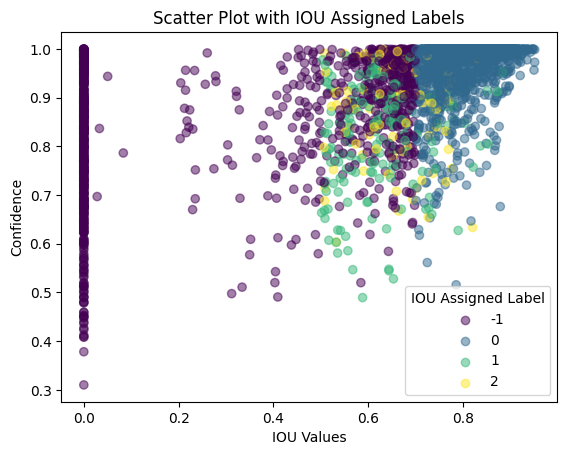

In [93]:
import matplotlib.pyplot as plt

scatter = plt.scatter(pl_iou_values, pl_conf_flt, c=iou_assigned_label, cmap='viridis', alpha=0.5)

unique_labels = np.unique(iou_assigned_label)
for label in unique_labels:
    plt.scatter([], [], c=scatter.cmap(scatter.norm(label)), label=label, alpha=0.5)

plt.legend(title='IOU Assigned Label')
plt.xlabel('IOU Values')
plt.ylabel('Confidence')
plt.title('Scatter Plot with IOU Assigned Labels')
plt.show()


/tmp/ipykernel_21776/4104594416.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=scatter.cmap(scatter.norm(label)), label=label, alpha=0.5)


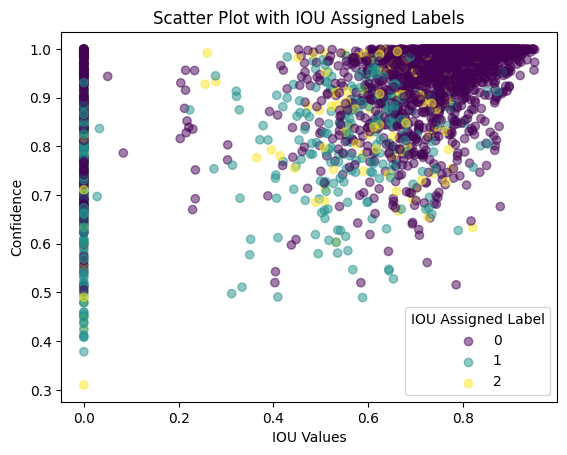

In [94]:
import matplotlib.pyplot as plt

scatter = plt.scatter(pl_iou_values, pl_conf_flt, c=pl_labels, cmap='viridis', alpha=0.5)

unique_labels = np.unique(pl_labels)
for label in unique_labels:
    plt.scatter([], [], c=scatter.cmap(scatter.norm(label)), label=label, alpha=0.5)

# Add legend
plt.legend(title='IOU Assigned Label')
plt.xlabel('IOU Values')
plt.ylabel('Confidence')
plt.title('Scatter Plot with IOU Assigned Labels')
plt.show()


In [95]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Apply bg_mask2 to the datasets for the first subplot
pl_labels1 = pl_labels[bg_mask2]
pl_iou_values2 = pl_iou_values2[bg_mask2]
pl_conf_flt1 = pl_conf_flt[bg_mask2]

# Apply bg_mask to the datasets for the second subplot
pl_labels2 = pl_labels[bg_mask]
pl_iou_values = pl_iou_values[bg_mask]
pl_conf_flt2 = pl_conf_flt[bg_mask]

colors = ['purple', 'rgba(255, 204, 0, 0.8)', 'green']  # Using a slightly transparent darker yellow

# Create the subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=("FPs - Fg_Iou_threshold @ [0.65, 0.45, 0.4]", 
                                                    "FPs - Fg_Iou_threshold @ [0.7, 0.5, 0.5]"))

# First subplot scatter trace
scatter1 = go.Scatter(
    y=pl_conf_flt1,
    x=pl_iou_values2,
    mode='markers',
    marker=dict(
        color=pl_labels1,
        colorscale=colors,  # Set custom colorscale
        size=5,
        opacity=0.6
    ),
    hoverinfo='text',
    text=pl_conf_flt1  # PL_Uid values for hover text
)

# Second subplot scatter trace
scatter2 = go.Scatter(
    y=pl_conf_flt2,
    x=pl_iou_values,
    mode='markers',
    marker=dict(
        color=pl_labels2,
        colorscale=colors,  # Set custom colorscale
        size=5,
        opacity=0.6
    ),
    hoverinfo='text',
    text=pl_conf_flt2  # PL_Uid values for hover text
)

# Add traces to the subplots
fig.add_trace(scatter1, row=1, col=1)
fig.add_trace(scatter2, row=1, col=2)
# Update layout for the entire figure
fig.update_layout(
    title_text='Comparison of FPs - IoU vs Confidences @ conf_thresh [0.5,0.25,0.25]',
    width=1200,
    height=600
)

# Update xaxis and yaxis for the first subplot
fig.update_xaxes(title_text='PL-GT IoU', range=(0, 1), tickvals=[i / 10 for i in (list(range(0, 11))[::-1])], row=1, col=1)
fig.update_yaxes(title_text='PL Confidences', range=(0, 1), tickvals=[i / 10 for i in (list(range(0, 11))[::-1])], row=1, col=1)

# Update xaxis and yaxis for the second subplot
fig.update_xaxes(title_text='PL-GT IoU', range=(0, 1), tickvals=[i / 10 for i in (list(range(0, 11))[::-1])], row=1, col=2)
fig.update_yaxes(title_text='PL Confidences', range=(0, 1), tickvals=[i / 10 for i in (list(range(0, 11))[::-1])], row=1, col=2)

# Show plot
fig.show()


IndexError: The shape of the mask [7325] at index 0 does not match the shape of the indexed tensor [3232] at index 0

In [48]:
sh_gt_array = np.concatenate(snapshot_pl_data_20['shared_features_gt'])
iou_assigned_label = snapshot_pl_data_20['iou_assigned_label']
iou_assigned_label = torch.cat(iou_assigned_label).cpu()
pl_labels = snapshot_pl_data_20['pl_labels']
pl_labels = torch.cat(pl_labels).cpu()
lbl_sh_gt_array = np.concatenate(snapshot_pl_data_20['lbl_shared_features_gt'])
lbl_pl_labels = snapshot_pl_data_20['lbl_pl_labels']
lbl_pl_labels = torch.cat(lbl_pl_labels).cpu()

In [6]:
'''
Similarities for labeled data

'''
from torch.functional import F
x,y = torch.sort(lbl_pl_labels) # make it contiguous according to labels
lbl_sorted_features = lbl_sh_gt_array[y]

car_mask = x==0 # Apply car mask
ped_mask = x==1 # Apply pedestrian mask
cyc_mask = x==2 # Apply cyclist mask
x_car = x[car_mask]
lbl_sorted_features_car = lbl_sorted_features[car_mask]

x_ped = x[ped_mask]
lbl_sorted_features_ped = lbl_sorted_features[ped_mask]

x_cyc= x[cyc_mask]
lbl_sorted_features_cyc = lbl_sorted_features[cyc_mask]

car_lbl_features = torch.from_numpy(lbl_sorted_features_car)
ped_lbl_features = torch.from_numpy(lbl_sorted_features_ped)
cyc_lbl_features = torch.from_numpy(lbl_sorted_features_cyc)

# lbl_features= torch.cat((car_lbl_features,ped_lbl_features,cyc_lbl_features),dim=0)
lbl_similarity_matrix_car = F.normalize(car_lbl_features,dim=-1) @ F.normalize(car_lbl_features,dim=-1).t()
lbl_similarity_matrix_ped = F.normalize(ped_lbl_features,dim=-1) @ F.normalize(ped_lbl_features,dim=-1).t()
lbl_similarity_matrix_cyc = F.normalize(cyc_lbl_features,dim=-1) @ F.normalize(cyc_lbl_features,dim=-1).t()
print("Car", lbl_similarity_matrix_car.mean())
print("Ped", lbl_similarity_matrix_ped.mean())
print("Cyc", lbl_similarity_matrix_cyc.mean())



Car tensor(0.4807)
Ped tensor(0.4350)
Cyc tensor(0.5727)


In [49]:
sorted_labels, indices = torch.sort(pl_labels) # make it contiguous according to labels
sorted_features = sh_gt_array[indices]
sorted_iou_assigned_label = iou_assigned_label[indices]

car_mask = sorted_labels == 0 # Apply car mask
sorted_labels_car = sorted_labels[car_mask]
sorted_features_car = sorted_features[car_mask]
sorted_iou_assigned_label_car = sorted_iou_assigned_label[car_mask]


In [50]:
tp_mask = sorted_iou_assigned_label_car==0 # GT overlap labels determine TP/FP

In [51]:
tp_mask,arg_tps = torch.sort(tp_mask) #Fps first, tps at end
sorted_labels_car_tporder = sorted_labels_car[arg_tps]
sorted_features_car_tporder = sorted_features_car[arg_tps]
sorted_iou_assigned_label_car_tporder = sorted_iou_assigned_label_car[arg_tps]

In [52]:
val = torch.where(pl_labels==0)[0]

In [54]:
tp_indices_tporder = torch.nonzero(tp_mask).squeeze()
tp_indices_tporder_idx = arg_tps[tp_indices_tporder]
fp_indices_tporder = torch.nonzero(~tp_mask).squeeze()
fp_indices_tporder_idx = arg_tps[fp_indices_tporder]


In [55]:
print(val.shape)
assert val.shape[0] == tp_indices_tporder_idx.shape[0] + fp_indices_tporder_idx.shape[0]

torch.Size([2677])


In [64]:
N = similarity_matrix_car_tp.shape[0]

n_up = (N**2 - N)/2

tensor(0.4500)


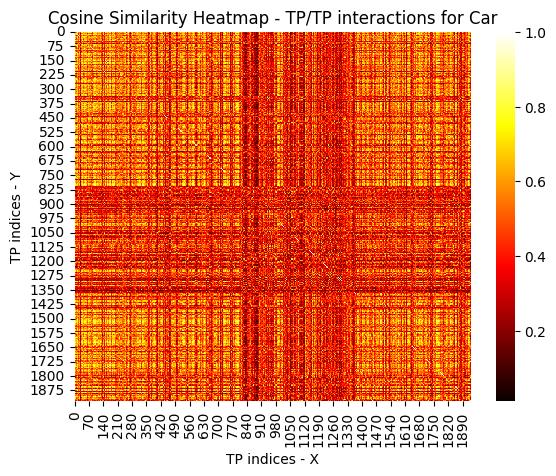

In [69]:
from torch.functional import F
car_tp_features = sorted_features_car_tporder[tp_indices_tporder_idx]
car_tp_features = torch.from_numpy(car_tp_features)
similarity_matrix_car_tp = F.normalize(car_tp_features,dim=-1) @ F.normalize(car_tp_features,dim=-1).t()
print(((similarity_matrix_car_tp.sum() - N) / 2) / n_up)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(similarity_matrix_car_tp, cmap='hot')
plt.xlabel('TP indices - X')
plt.ylabel('TP indices - Y')
plt.title('Cosine Similarity Heatmap - TP/TP interactions for Car')
plt.show()


tensor(0.4481)


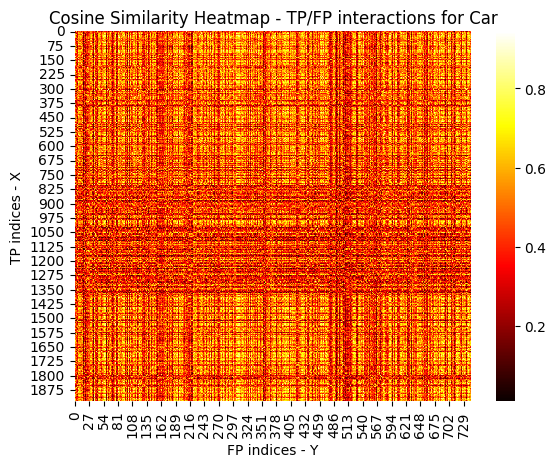

In [14]:
from torch.functional import F
car_tp_features = sorted_features_car_tporder[tp_indices_tporder_idx]
car_tp_features = torch.from_numpy(car_tp_features)
car_fp_features = sorted_features_car_tporder[fp_indices_tporder_idx]
car_fp_features = torch.from_numpy(car_fp_features)

# indices = torch.cat((tp_indices_tporder,fp_indices_tporder), dim=0)
# print(indices)
similarity_matrix_car_tp_fp = F.normalize(car_tp_features,dim=-1) @ F.normalize(car_fp_features,dim=-1).t()
print(similarity_matrix_car_tp_fp.mean())
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(similarity_matrix_car_tp_fp, cmap='hot')
plt.xlabel('FP indices - Y')
plt.ylabel('TP indices - X')
plt.title('Cosine Similarity Heatmap - TP/FP interactions for Car')
plt.show()


In [97]:
similarity_matrix_car_tp_1 = torch.triu(similarity_matrix_car_tp, diagonal=1)
similarity_matrix_car_tp_1.sum()*2 / (car_tp_features.shape[0] * car_tp_features.shape[0] - N)

tensor(0.4500)

In [96]:
Nu_car_tp_fp = torch.triu_indices(car_tp_features.shape[0], car_fp_features.shape[0],0).shape[1]
similarity_matrix_car_tp_fp_1 = torch.triu(similarity_matrix_car_tp_fp, diagonal=0)
similarity_matrix_car_tp_fp_1.sum() / Nu_car_tp_fp

tensor(0.4748)

tensor(0.4491)


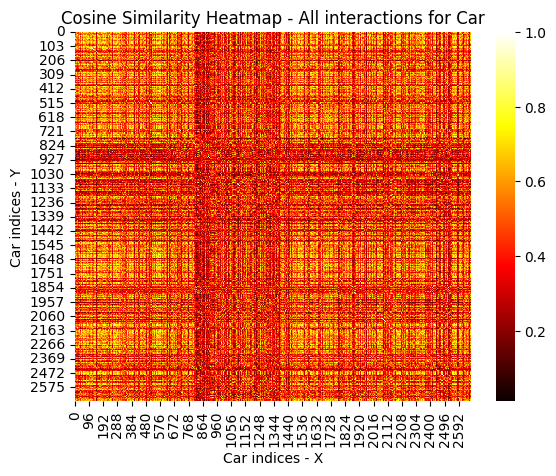

In [15]:
car_all_features = torch.cat((car_tp_features,car_fp_features),dim=0)
similarity_matrix_car_all = F.normalize(car_all_features,dim=-1) @ F.normalize(car_all_features,dim=-1).t()
import seaborn as sns
import matplotlib.pyplot as plt
print(similarity_matrix_car_all.mean())
sns.heatmap(similarity_matrix_car_all, cmap='hot')
plt.xlabel('Car indices - X')
plt.ylabel('Car indices - Y')
plt.title('Cosine Similarity Heatmap - All interactions for Car')
plt.show()

In [66]:
Nl = lbl_similarity_matrix_car.shape[0]
n_upl = (Nl**2 - Nl)/2
print(((lbl_similarity_matrix_car.sum() - Nl) / 2) / n_upl)

tensor(0.4807)


In [16]:
print(similarity_matrix_car_all.mean())
print(similarity_matrix_car_tp.mean())
print(lbl_similarity_matrix_car.mean())

tensor(0.4491)
tensor(0.4503)
tensor(0.4807)


###
Pedestrian Similarities


In [17]:
sh_gt_array = np.concatenate(snapshot_pl_data_20['shared_features_gt'])
iou_assigned_label = snapshot_pl_data_20['iou_assigned_label']
iou_assigned_label = torch.cat(iou_assigned_label).cpu()
pl_labels = snapshot_pl_data_20['pl_labels']
pl_labels = torch.cat(pl_labels).cpu()
sorted_labels, indices = torch.sort(pl_labels) # make it contiguous according to labels
sorted_features = sh_gt_array[indices]
sorted_iou_assigned_label = iou_assigned_label[indices]

ped_mask = sorted_labels==1 # Apply ped mask
sorted_labels_ped = sorted_labels[ped_mask]
sorted_features_ped = sorted_features[ped_mask]
sorted_iou_assigned_label_ped= sorted_iou_assigned_label[ped_mask]
tp_mask = sorted_iou_assigned_label_ped==1 # GT overlap labels determine TP/FP
tp_mask, arg_tps = torch.sort(tp_mask) #Fps first, tps at end
sorted_labels_ped_tporder = sorted_labels_ped[arg_tps]
sorted_features_ped_tporder = sorted_features_ped[arg_tps]
sorted_iou_assigned_label_ped_tporder = sorted_iou_assigned_label_ped[arg_tps]
tp_indices_tporder = torch.nonzero(tp_mask).squeeze()
tp_indices_tporder_idx = arg_tps[tp_indices_tporder]
fp_indices_tporder = torch.nonzero(~tp_mask).squeeze()
fp_indices_tporder_idx = arg_tps[fp_indices_tporder]



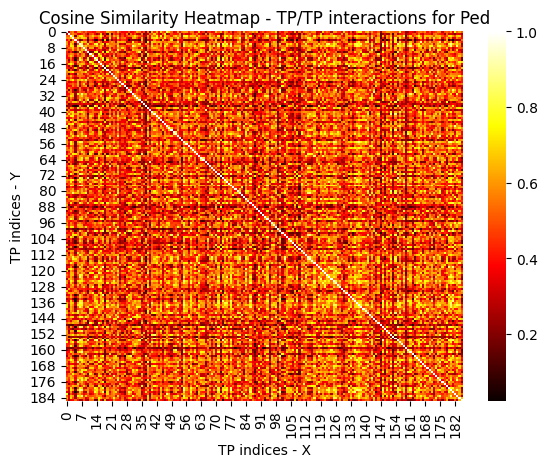

In [18]:
from torch.functional import F
ped_tp_features = sorted_features_ped_tporder[tp_indices_tporder_idx]
ped_tp_features = torch.from_numpy(ped_tp_features)
similarity_matrix_ped_tp = F.normalize(ped_tp_features,dim=-1) @ F.normalize(ped_tp_features,dim=-1).t()
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(similarity_matrix_ped_tp, cmap='hot')
plt.xlabel('TP indices - X')
plt.ylabel('TP indices - Y')
plt.title('Cosine Similarity Heatmap - TP/TP interactions for Ped')
plt.show()


In [19]:
print(similarity_matrix_ped_tp.shape)
print(similarity_matrix_ped_tp.diag().sum())

torch.Size([186, 186])
tensor(186.)


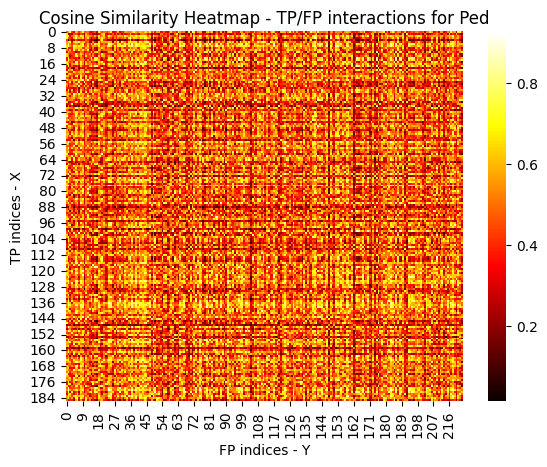

In [20]:
from torch.functional import F
ped_tp_features = sorted_features_ped_tporder[tp_indices_tporder_idx]
ped_tp_features = torch.from_numpy(ped_tp_features)
ped_fp_features = sorted_features_ped_tporder[fp_indices_tporder_idx]
ped_fp_features = torch.from_numpy(ped_fp_features)
similarity_matrix_ped_tp_fp = F.normalize(ped_tp_features,dim=-1) @ F.normalize(ped_fp_features,dim=-1).t()
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(similarity_matrix_ped_tp_fp, cmap='hot')
plt.xlabel('FP indices - Y')
plt.ylabel('TP indices - X')
plt.title('Cosine Similarity Heatmap - TP/FP interactions for Ped')
plt.show()


tensor(0.4683)


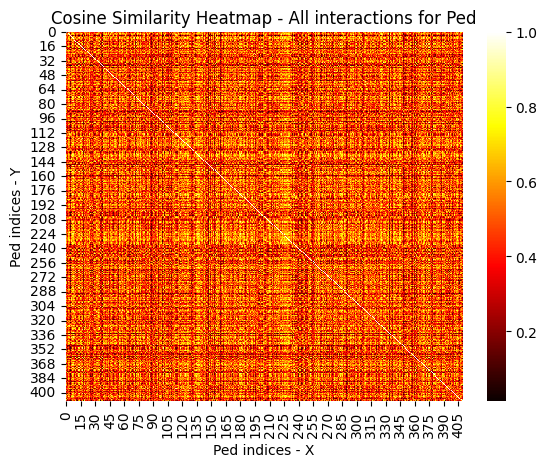

In [238]:
ped_all_features = torch.cat((ped_tp_features,ped_fp_features),dim=0)
similarity_matrix_ped_all = F.normalize(ped_all_features,dim=-1) @ F.normalize(ped_all_features,dim=-1).t()
import seaborn as sns
import matplotlib.pyplot as plt
print(similarity_matrix_ped_all.mean())
sns.heatmap(similarity_matrix_ped_all, cmap='hot')
plt.xlabel('Ped indices - X')
plt.ylabel('Ped indices - Y')
plt.title('Cosine Similarity Heatmap - All interactions for Ped')
plt.show()

In [115]:
similarity_matrix_ped_tp_1 = torch.triu(similarity_matrix_ped_tp, diagonal=1)
print(similarity_matrix_ped_tp_1.sum()*2 / (ped_tp_features.shape[0] * ped_tp_features.shape[0] - N))


Nu_ped_tp_fp = torch.triu_indices(ped_tp_features.shape[0], ped_fp_features.shape[0],0).shape[1]
similarity_matrix_ped_tp_fp_1 = torch.triu(similarity_matrix_ped_tp_fp, diagonal=0)
similarity_matrix_ped_tp_fp_1.sum() / Nu_ped_tp_fp

tensor(0.4900)


tensor(0.4626)

In [ ]:
similarity_matrix_cyc_tp_1 = torch.triu(similarity_matrix_cyc_tp, diagonal=1)
print(similarity_matrix_cyc_tp_1.sum()*2 / (ped_tp_features.shape[0] * ped_tp_features.shape[0] - N))


Nu_cyc_tp_fp = torch.triu_indices(cyc_tp_features.shape[0], cyc_fp_features.shape[0],0).shape[1]
similarity_matrix_cyc_tp_fp_1 = torch.triu(similarity_matrix_cyc_tp_fp, diagonal=0)
similarity_matrix_cyc_tp_fp_1.sum() / Nu_cyc_tp_fp

In [239]:
print(similarity_matrix_ped_all.mean())
print(similarity_matrix_ped_tp.mean())
print(lbl_similarity_matrix_ped.mean())

tensor(0.4683)
tensor(0.4680)
tensor(0.4350)


In [29]:
sh_gt_array = np.concatenate(snapshot_pl_data_20['shared_features_gt'])
iou_assigned_label = snapshot_pl_data_20['iou_assigned_label']
iou_assigned_label = torch.cat(iou_assigned_label).cpu()
pl_labels = snapshot_pl_data_20['pl_labels']
pl_labels = torch.cat(pl_labels).cpu()
sorted_labels, indices = torch.sort(pl_labels) # make it contiguous according to labels
sorted_features = sh_gt_array[indices]
sorted_iou_assigned_label = iou_assigned_label[indices]

cyc_mask = sorted_labels==2 # Apply cyc mask
sorted_labels_cyc = sorted_labels[cyc_mask]
sorted_features_cyc = sorted_features[cyc_mask]
sorted_iou_assigned_label_cyc= sorted_iou_assigned_label[cyc_mask]
tp_mask = sorted_iou_assigned_label_cyc==2 # GT overlap labels determine TP/FP
tp_mask,arg_tps = torch.sort(tp_mask) #Fps first, tps at end
sorted_labels_cyc_tporder = sorted_labels_cyc[arg_tps]
sorted_features_cyc_tporder = sorted_features_cyc[arg_tps]
sorted_iou_assigned_label_cyc_tporder = sorted_iou_assigned_label_cyc[arg_tps]
tp_indices_tporder = torch.nonzero(tp_mask).squeeze()
tp_indices_tporder_idx = arg_tps[tp_indices_tporder]
fp_indices_tporder = torch.nonzero(~tp_mask).squeeze()
fp_indices_tporder_idx = arg_tps[fp_indices_tporder]


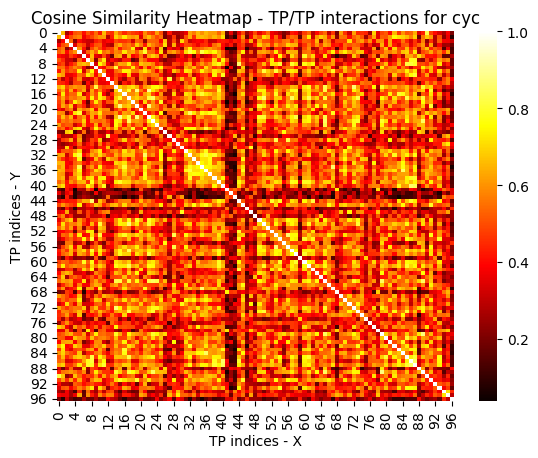

tensor(0.4717)


In [30]:
from torch.functional import F
cyc_tp_features = sorted_features_cyc_tporder[tp_indices_tporder_idx]
cyc_tp_features = torch.from_numpy(cyc_tp_features)
similarity_matrix_cyc_tp = F.normalize(cyc_tp_features,dim=-1) @ F.normalize(cyc_tp_features,dim=-1).t()
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(similarity_matrix_cyc_tp, cmap='hot')
plt.xlabel('TP indices - X')
plt.ylabel('TP indices - Y')
plt.title('Cosine Similarity Heatmap - TP/TP interactions for cyc')
plt.show()
print(similarity_matrix_cyc_tp.mean())

In [32]:
print(similarity_matrix_cyc_tp.shape)
print(similarity_matrix_cyc_tp.diag().sum())

torch.Size([97, 97])
tensor(97.)


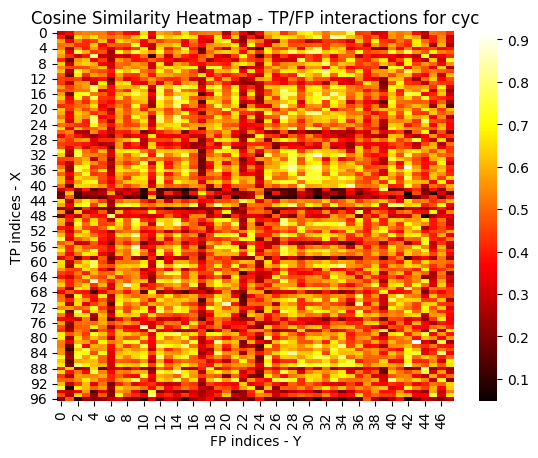

In [31]:
from torch.functional import F
cyc_tp_features = sorted_features_cyc_tporder[tp_indices_tporder_idx]
cyc_tp_features = torch.from_numpy(cyc_tp_features)
cyc_fp_features = sorted_features_cyc_tporder[fp_indices_tporder_idx]
cyc_fp_features = torch.from_numpy(cyc_fp_features)
similarity_matrix_cyc_tp_fp = F.normalize(cyc_tp_features,dim=-1) @ F.normalize(cyc_fp_features,dim=-1).t()
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(similarity_matrix_cyc_tp_fp, cmap='hot')
plt.xlabel('FP indices - Y')
plt.ylabel('TP indices - X')
plt.title('Cosine Similarity Heatmap - TP/FP interactions for cyc')
plt.show()

tensor(0.4792)


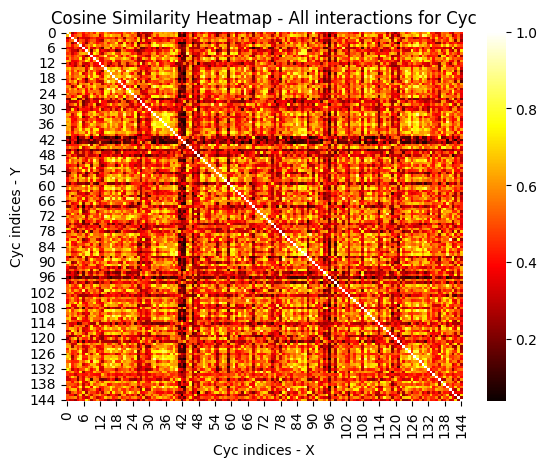

In [33]:
cyc_all_features = torch.cat((cyc_tp_features,cyc_fp_features),dim=0)
similarity_matrix_cyc_all = F.normalize(cyc_all_features,dim=-1) @ F.normalize(cyc_all_features,dim=-1).t()
import seaborn as sns
import matplotlib.pyplot as plt
print(similarity_matrix_cyc_all.mean())
sns.heatmap(similarity_matrix_cyc_all, cmap='hot')
plt.xlabel('Cyc indices - X')
plt.ylabel('Cyc indices - Y')
plt.title('Cosine Similarity Heatmap - All interactions for Cyc')
plt.show()

In [34]:
print(similarity_matrix_cyc_tp.mean())
print(similarity_matrix_cyc_all.mean())
print(lbl_similarity_matrix_cyc.mean())

tensor(0.4717)
tensor(0.4792)
tensor(0.5727)


In [ ]:
# snapshot_pl_data_20['frame_id']
# import matplotlib.pyplot as plt
# from collections import Counter
# frame_frequency = Counter(snapshot_pl_data_20['frame_id'])
# frame_ids = list(frame_frequency.keys())
# frequencies = list(frame_frequency.values())
# sorted_frame_ids = sorted(frame_ids)
# sorted_frequencies = [frame_frequency[frame_id] for frame_id in sorted_frame_ids]

In [ ]:
# # Create a bar plot
# plt.figure(figsize=(10, 6))
# plt.bar(sorted_frame_ids, sorted_frequencies, color='skyblue')
# # plt.xlabel('Frame IDs')
# plt.ylabel('Frequency')
# plt.title('Frequency of Frame IDs')
# plt.grid(axis='y', linestyle='--')
# # plt.xticks(rotation=90)
# plt.tight_layout()
# plt.show()


In [98]:
for i in range(len(snapshot_pl_data_20['gt_inds_over_thresh'])) :
    snapshot_pl_data_20['unique_gt_inds_over_thresh'][i] = torch.unique(snapshot_pl_data_20['gt_inds_over_thresh'][i])

In [99]:
gts_for_recall = []
for idxs, gt_classes in zip(snapshot_pl_data_20['unique_gt_inds_over_thresh'],snapshot_pl_data_20['gt_classes']):
    selected_classes = torch.index_select(gt_classes, 0, idxs)
    gts_for_recall.append(selected_classes)
gts_for_recall = np.concatenate(gts_for_recall)

In [100]:
print(gts_for_recall.shape)
print(gt_classes.shape)


(2216,)
torch.Size([1])


In [101]:
for i in range(len(snapshot_pl_data_20['gt_inds_over_thresh2'])) :
    snapshot_pl_data_20['unique_gt_inds_over_thresh2'][i] = torch.unique(snapshot_pl_data_20['gt_inds_over_thresh2'][i])
gts_for_recall2 = []
for idxs, gt_classes in zip(snapshot_pl_data_20['unique_gt_inds_over_thresh2'],snapshot_pl_data_20['gt_classes2']):
    # Use torch.index_select to efficiently gather GT classes
    selected_classes = torch.index_select(gt_classes, 0, idxs)
    # indices = torch.where(assigned_iou_flag != -1)[0]
    # selected_classes =  selected_classes[indices]
    # print(selected_classes)
    gts_for_recall2.append(selected_classes)
gts_for_recall2 = np.concatenate(gts_for_recall2)

KeyError: 'unique_gt_inds_over_thresh2'

In [102]:
len(snapshot_pl_data_20['pl_uids'])

881

In [103]:
for i in range(len(snapshot_pl_data_20['iou_assigned_label2'])):
    snapshot_pl_data_20['iou_assigned_label2'][i] = snapshot_pl_data_20['iou_assigned_label2'][i].cpu()

iou_assigned_label2 = np.concatenate(snapshot_pl_data_20['iou_assigned_label2'])
iou_values2 = np.concatenate(snapshot_pl_data_20['iou_values2'])
gt_classes2 = np.concatenate(snapshot_pl_data_20['gt_classes2'])

print(gts_for_recall2.shape)
print(gt_classes2.shape)


NameError: name 'gts_for_recall2' is not defined

In [104]:
sh_gt_array = np.concatenate(snapshot_pl_data_20['shared_features_gt'])
sh_gt_array.shape
pl_labels = np.concatenate(snapshot_pl_data_20['pl_labels'])
for i in range(len(snapshot_pl_data_20['iou_assigned_label'])):
    snapshot_pl_data_20['iou_assigned_label'][i] = snapshot_pl_data_20['iou_assigned_label'][i].cpu()

iou_assigned_label = np.concatenate(snapshot_pl_data_20['iou_assigned_label'])
iou_assigned_label.shape
pl_boxes = np.concatenate(snapshot_pl_data_20['pl_boxes'])
gt_boxes = np.concatenate(snapshot_pl_data_20['ori_gt_boxes'])
gt_classes = np.concatenate(snapshot_pl_data_20['gt_classes'])
frames =  np.array(snapshot_pl_data_20['frame_id'])
iou_values = np.concatenate(snapshot_pl_data_20['iou_values'])
pl_uids = np.concatenate(snapshot_pl_data_20['pl_uids'])
np.unique(frames).shape
print(pl_boxes.shape, gt_boxes.shape)
print(np.unique(frames).shape)
print(iou_values.shape)
print(pl_uids.shape)
print(pl_labels.shape)

(3232, 8) (4064, 8)
(784,)
(3232,)
(3232,)
(3232,)


In [105]:
PL_all_precision  = (iou_assigned_label > -1).sum() / iou_assigned_label.shape[0]
PL_car_precision = ((iou_assigned_label==0).astype(int) * (pl_labels.astype(int)==0)).sum() / (pl_labels==0).sum()
PL_ped_precision = ((iou_assigned_label==1).astype(int) * (pl_labels.astype(int)==1)).sum() / (pl_labels==1).sum()
PL_cyc_precision =((iou_assigned_label==2).astype(int) * (pl_labels.astype(int)==2)).sum() / (pl_labels==2).sum()

print("Precision FG/BG all PLs:",PL_all_precision )
print("Precision FG/BG for Car PLs:", PL_car_precision)
print("Precision FG/BG for Pedestrian PLs:", PL_ped_precision)
print("Precision FG/BG for for Cyclist PLs:", PL_cyc_precision)



Precision FG/BG all PLs: 0.6856435643564357
Precision FG/BG for Car PLs: 0.7220769518117296
Precision FG/BG for Pedestrian PLs: 0.45365853658536587
Precision FG/BG for for Cyclist PLs: 0.6689655172413793


In [ ]:
a = torch.where(pl_labels==0)
b = iou_assigned_label[a]
b = b.float()
print("Car",torch.histogram(b, bins=torch.tensor([-1,0,1,2,3,4]).float()))
a = torch.where(pl_labels==1)
b = iou_assigned_label[a]
b= b.float()
print("Ped",torch.histogram(b, bins=torch.tensor([-1,0,1,2,3,4]).float()))
a = torch.where(pl_labels==2)
b = iou_assigned_label[a]
b= b.float()
print("Cyc",torch.histogram(b, bins=torch.tensor([-1,0,1,2,3,4]).float()))

TypeError: where(): argument 'condition' (position 1) must be Tensor, not numpy.ndarray

In [106]:
PL_all_precision  = (iou_assigned_label2 > -1).sum() / iou_assigned_label2.shape[0]
PL_car_precision = ((iou_assigned_label2==0).astype(int) * (pl_labels.astype(int)==0)).sum() / (pl_labels==0).sum()
PL_ped_precision = ((iou_assigned_label2==1).astype(int) * (pl_labels.astype(int)==1)).sum() / (pl_labels==1).sum()
PL_cyc_precision =((iou_assigned_label2==2).astype(int) * (pl_labels.astype(int)==2)).sum() / (pl_labels==2).sum()

print("Precision2 FG/BG all PLs:",PL_all_precision )
print("Precision2 FG/BG for Car PLs:", PL_car_precision)
print("Precision2 FG/BG for Pedestrian PLs:", PL_ped_precision)
print("Precision2 FG/BG for for Cyclist PLs:", PL_cyc_precision)

Precision2 FG/BG all PLs: 0.7592821782178217
Precision2 FG/BG for Car PLs: 0.8012700784460217
Precision2 FG/BG for Pedestrian PLs: 0.5
Precision2 FG/BG for for Cyclist PLs: 0.7172413793103448


In [107]:
PL_all_recall  = gts_for_recall.shape[0] / gt_classes.shape[0]
PL_car_recall = (gts_for_recall==0).sum() / ( gt_classes==0).sum()
PL_ped_recall = (gts_for_recall==1).sum() / ( gt_classes==1).sum()
PL_cyc_recall =(gts_for_recall==2).sum() / ( gt_classes==2).sum()

print("Recall FG/BG all GTs:",PL_all_recall)
print("Recall FG/BG for Car GTs:", PL_car_recall)
print("Recall FG/BG for Pedestrian GTs:", PL_ped_recall)
print("Recall FG/BG for for Cyclist GTs:", PL_cyc_recall)


Recall FG/BG all GTs: 0.5452755905511811
Recall FG/BG for Car GTs: 0.5749553837001785
Recall FG/BG for Pedestrian GTs: 0.35294117647058826
Recall FG/BG for for Cyclist GTs: 0.5542857142857143


In [108]:
PL_all_recall2  = gts_for_recall2.shape[0] / gt_classes.shape[0]
PL_car_recall2 = (gts_for_recall2==0).sum() / ( gt_classes==0).sum()
PL_ped_recall2 = (gts_for_recall2==1).sum() / ( gt_classes==1).sum()
PL_cyc_recall2 =(gts_for_recall2==2).sum() / ( gt_classes==2).sum()

print("Recall2 FG/BG all GTs:",PL_all_recall2)
print("Recall2 FG/BG for Car GTs:", PL_car_recall2)
print("Recall2 FG/BG for Pedestrian GTs:", PL_ped_recall2)
print("Recall2 FG/BG for for Cyclist GTs:", PL_cyc_recall2)


NameError: name 'gts_for_recall2' is not defined

In [ ]:
# import matplotlib.pyplot as plt
# plt.style.use('dark_background')
# fig, axs = plt.subplots(1, 3, figsize=(16, 8))  # Create a figure with 3 subplots side by side
# for ax in axs:
#     ax.grid(False)
# # Plot the first scatter plot in the first subplot
# axs[0].hist(iou_values[pl_labels ==0])
# axs[0].set_title('Car PLs : assigned_iou',fontsize = 12)
# axs[0].axvline(x=0.7, color='red', linestyle='--')
# # Plot the second scatter plot in the second subplot
# axs[1].hist(iou_values[pl_labels ==1])
# axs[1].set_title('Ped PLs : assigned_iou',fontsize = 12)
# axs[1].axvline(x=0.5, color='red', linestyle='--')
# # Plot the third scatter plot in the third subplot
# axs[2].hist(iou_values[pl_labels ==2])
# axs[2].set_title('Cyc PLs : assigned_iou', fontsize = 12)
# axs[2].axvline(x=0.5, color='red', linestyle='--')
# plt.tight_layout()  # Adjust layout to prevent overlapping
# plt.show()

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# plt.style.use('default')
# from sklearn.manifold import TSNE
# from sklearn.preprocessing import StandardScaler
# from matplotlib.colors import ListedColormap

# # Create a sample dataset
# x = sh_gt_array
# y = pl_labels.astype(int)
# iou_asgns= iou_assigned_label
# pl_uids =  pl_uids
# # Normalize the features
# scaler = StandardScaler()
# x_normalized = scaler.fit_transform(x)

# # Perform t-SNE on normalized features
# tsne = TSNE(n_components=2, perplexity=30, learning_rate='auto', n_iter=1500, random_state=0)
# x_tsne = tsne.fit_transform(x_normalized)

# darker_yellow = (1, 0.8, 0)  # RGB values for a slightly darker yellow
# colors = ['purple', darker_yellow, 'green']
# cmap = ListedColormap(colors)
# scatter = plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y, cmap=cmap, s=1.5)

# legend_labels = ['Car', 'Pedestrian', 'Cyclist']
# handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=8, markerfacecolor=color) for color in colors]
# plt.legend(handles=handles, labels=legend_labels)

# plt.xlabel('t-SNE Component 1')
# plt.ylabel('t-SNE Component 2')
# title = "t-SNE: Shared features PL unlabeled- ckpt 80, second stage"
# plt.title(title)

# plt.show()

In [109]:
import plotly.graph_objects as go
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Create a sample dataset
x = sh_gt_array
y = pl_labels.astype(int)
iou_asgns = iou_assigned_label
iou_asgns2 = iou_assigned_label2
pl_uids = pl_uids

# Normalize the features
scaler = StandardScaler()
x_normalized = scaler.fit_transform(x)

# Perform t-SNE on normalized features
tsne = TSNE(n_components=2, perplexity=30, learning_rate='auto', n_iter=1500, random_state=0)
x_tsne = tsne.fit_transform(x_normalized)




In [110]:
# Define custom colors for each class
colors = ['purple', 'rgba(255, 204, 0, 0.8)', 'green']  # Using a slightly transparent darker yellow

# Create trace for scatter plot
scatter = go.Scatter(
    y=x_tsne[:, 0],
    x=x_tsne[:, 1],
    mode='markers',
    marker=dict(
        color=y,
        colorscale=colors,  # Set custom colorscale
        size=5,
        opacity = 0.6
    ),
    hoverinfo='text',
    text=pl_uids  # PL_Uid values for hover text
)

# Create layout
layout = go.Layout(
    title='t-SNE: Shared features PL unlabeled - ckpt 80, second stage',
    xaxis=dict(title='t-SNE Component 1'),
    yaxis=dict(title='t-SNE Component 2'), width=600, height=500
)

# Create figure
fig = go.Figure(data=[scatter], layout=layout)

# Show plot
fig.show()

In [111]:
comparison_result = np.where(iou_assigned_label == pl_labels, 1, -1)
sh_gt_type1 = sh_gt_array[comparison_result == 1]
sh_gt_type2 = sh_gt_array[comparison_result == -1]

pl_labels_type1 = pl_labels[comparison_result == 1]
pl_labels_type2 = pl_labels[comparison_result == -1]

pl_uids_type1 = pl_uids[comparison_result == 1]
pl_uids_type2 = pl_uids[comparison_result == -1]

iou_assigned_label_type1 = iou_assigned_label[comparison_result == 1]
iou_assigned_label_type2 = iou_assigned_label[comparison_result == -1]

x_tsne_tp = x_tsne[comparison_result == 1]
x_tsne_fp = x_tsne[comparison_result == -1] 

In [112]:
comparison_result2 = np.where(iou_assigned_label2 == pl_labels, 1, -1)
sh_gt_type12 = sh_gt_array[comparison_result2 == 1]
sh_gt_type22 = sh_gt_array[comparison_result2 == -1]

pl_labels_type12 = pl_labels[comparison_result2 == 1]
pl_labels_type22 = pl_labels[comparison_result2 == -1]

pl_uids_type12 = pl_uids[comparison_result2 == 1]
pl_uids_type22 = pl_uids[comparison_result2 == -1]

iou_assigned_label_type12 = iou_assigned_label2[comparison_result2 == 1]
iou_assigned_label_type22 = iou_assigned_label2[comparison_result2 == -1]

x_tsne_tp2 = x_tsne[comparison_result2 == 1]
x_tsne_fp2 = x_tsne[comparison_result2 == -1] 

In [113]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import webbrowser

# Define the colors and colormap
darker_yellow = 'rgba(255, 204, 0, 0.8)'  # RGBA values for a slightly darker yellow
colors = ['purple', darker_yellow, 'green']
legend_labels = ['Car', 'Pedestrian', 'Cyclist']

# Create traces for each subplot
trace1 = go.Scatter(
    y=x_tsne_tp[:, 0],
    x=x_tsne_tp[:, 1],
    mode='markers',
    marker=dict(color=pl_labels_type1, colorscale=colors, size=3, opacity=0.6),
    name='All PLs: TP Scatter',
    hoverinfo='text',
    text=pl_uids_type1
)

trace2 = go.Scatter(
    y=x_tsne_fp[:, 0],
    x=x_tsne_fp[:, 1],
    mode='markers',
    marker=dict(color=pl_labels_type2, colorscale=colors, size=3, opacity=0.6),
    name='All PLs: FP Scatter',
    hoverinfo='text',
    text=pl_uids_type2
)

# Create subplot layout with shared y-axis
fig = make_subplots(
    rows=1, cols=2, subplot_titles=('All PLs: TP Scatter', 'All PLs:FP Scatter'),
    shared_yaxes=True  # Share the y-axis
)

# Add traces to the subplot
fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=1, col=2)

# Update layout
fig.update_layout(
    title='PL feature tSNE: Objectness TP/FP @ [0.7, 0.5, 0.5]',
    xaxis=dict(title='t-SNE Component 1'),
    yaxis=dict(title='t-SNE Component 2'),
    showlegend=True,
    legend=dict(x=0.02, y=0.98, bgcolor='rgba(255,255,255,0.6)'),
    hovermode='closest',
    width=1000,  # Adjust width to accommodate both subplots
    # Set the domain for each subplot to remove the gap
    # The domain represents the fraction of the whole plot area allocated to each subplot
    # For the left subplot, we allocate 50% of the width, and for the right subplot, we allocate 50% starting from 55% of the width
    # This will make the y-axis of the left subplot align with the right side of the plot
    # Adjust these values as needed to fit your desired layout
    # Reference: https://plotly.com/python/creating-and-updating-figures/#setting-the-size-of-the-plots-rows-and-columns
    grid=dict(rows=1, columns=2, xgap=0.05),
    xaxis1=dict(domain=[0, 0.45]),
    xaxis2=dict(domain=[0.45, 0.9]),
)

fig.add_shape(
    type="line",
    x0=0.45,
    y0=0,
    x1=0.45,
    y1=1,
    line=dict(color="black", width=1, dash="dashdot"),
    xref="paper",
    yref="paper"
)


# Show plot
fig.show()

# # Save plot to HTML file and open in browser
# html_file = "Tsne_TP_FP_plot.html"
# pio.write_html(fig, html_file, include_plotlyjs=True, default_height='50%', default_width='75%')
# webbrowser.open(html_file)


In [114]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import webbrowser

# Define the colors and colormap
darker_yellow = 'rgba(255, 204, 0, 0.8)'  # RGBA values for a slightly darker yellow
colors = ['purple', darker_yellow, 'green']
legend_labels = ['Car', 'Pedestrian', 'Cyclist']

# Create traces for each subplot
trace1 = go.Scatter(
    y=x_tsne_tp2[:, 0],
    x=x_tsne_tp2[:, 1],
    mode='markers',
    marker=dict(color=pl_labels_type12, colorscale=colors, size=3, opacity=0.6),
    name='All PLs: TP Scatter',
    hoverinfo='text',
    text=pl_uids_type12
)

trace2 = go.Scatter(
    y=x_tsne_fp2[:, 0],
    x=x_tsne_fp2[:, 1],
    mode='markers',
    marker=dict(color=pl_labels_type22, colorscale=colors, size=3, opacity=0.6),
    name='All PLs: FP Scatter',
    hoverinfo='text',
    text=pl_uids_type22
)

# Create subplot layout with shared y-axis
fig = make_subplots(
    rows=1, cols=2, subplot_titles=('All PLs: TP Scatter', 'All PLs:FP Scatter'),
    shared_yaxes=True  # Share the y-axis
)

# Add traces to the subplot
fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=1, col=2)

# Update layout
fig.update_layout(
    title='PL feature tSNE: Objectness TP/FP @ [0.65, 0.45, 0.4]',
    xaxis=dict(title='t-SNE Component 1'),
    yaxis=dict(title='t-SNE Component 2'),
    showlegend=True,
    legend=dict(x=0.02, y=0.98, bgcolor='rgba(255,255,255,0.6)'),
    hovermode='closest',
    width=1000,  # Adjust width to accommodate both subplots
    # Set the domain for each subplot to remove the gap
    # The domain represents the fraction of the whole plot area allocated to each subplot
    # For the left subplot, we allocate 50% of the width, and for the right subplot, we allocate 50% starting from 55% of the width
    # This will make the y-axis of the left subplot align with the right side of the plot
    # Adjust these values as needed to fit your desired layout
    # Reference: https://plotly.com/python/creating-and-updating-figures/#setting-the-size-of-the-plots-rows-and-columns
    grid=dict(rows=1, columns=2, xgap=0.05),
    xaxis1=dict(domain=[0, 0.45]),
    xaxis2=dict(domain=[0.45, 0.9]),
)

fig.add_shape(
    type="line",
    x0=0.45,
    y0=0,
    x1=0.45,
    y1=1,
    line=dict(color="black", width=1, dash="dashdot"),
    xref="paper",
    yref="paper"
)


# Show plot
fig.show()